# Quickstart Guide

This guide will give a quick intro to training PyTorch models with HugsVision. We'll start by loading in some data and defining a model, then we'll train it for a few epochs and see how well it does.

**Note**: The easiest way to use this tutorial is as a colab notebook, which allows you to dive in with no setup. We recommend you enable a free GPU with

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

**Note**: You need to have at least Python 3.6 to run the scripts.
**Note**: All the code is available in `recipes/blood_cells/object_detection`

## Install HugsVision

First we install HugsVision if needed. 

In [ ]:
try:
    import hugsvision
except:
    !pip install -q hugsvision
    import hugsvision
    
print(hugsvision.__version__)

## Downloading Data

First, we need to download the dataset called `BCCD (COCO)` [here](https://www.kaggle.com/ammarnassanalhajali/bccd-coco) which weight around ~9 MB.

## Renaming annotation files (if they aren't already)

According to our dataloader, we need to have the annotation file named like `_annotations.coco.json` for all the datasets:


In [ ]:
mv anns.json _annotations.coco.json

## Choose a object detection model on HuggingFace

Now we can choose our base model on which we will perform a fine-tuning to make it fit our needs.

Our choices aren't very large since they are only two models available yet on HuggingFace for this task and both are DETR based.

So, to be sure that the model will be compatible with `HugsVision` we need to have a model exported in `PyTorch` and compatible with the `object-detection` task obviously.

Models available with this criterias: https://huggingface.co/models?filter=pytorch&pipeline_tag=object-detection&sort=downloads

At the time I'am writing this, I recommand to use the following models:

* `facebook/detr-resnet-50`
* `facebook/detr-resnet-101`


In [ ]:
huggingface_model = 'facebook/detr-resnet-50'

## Train the model

So, once the model choosen, we can start building the `Trainer` and start the fine-tuning:

In [ ]:
from hugsvision.nnet.ObjectDetectionTrainer import ObjectDetectionTrainer

trainer = ObjectDetectionTrainer(
	model_name = "MyDETRModel",	
	output_dir = "./out/",
	
	train_path = "./BCCD_COCO/train/",
	dev_path   = "./BCCD_COCO/dev/",
	test_path  = "./BCCD_COCO/test/",
	
	model_path = huggingface_model,

	max_epochs = 1,
	batch_size = 4
)

## Inference / Predictions

Congratulation, you have train your first DERT model.

So, now we need to use this trained model to make ground truth predictions.

But before anything else, we need to rename the **./OUTPUT_DIR/config.json** file into **./OUTPUT_DIR/preprocessor_config.json** to be compatible with HuggingFace.

In [ ]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection
from hugsvision.inference.ObjectDetectionInference import ObjectDetectionInference

inference = ObjectDetectionInference(
    DetrFeatureExtractor.from_pretrained("./OUTPUT_DIR/"),
    DetrForObjectDetection.from_pretrained("./OUTPUT_DIR/", from_tf=False)
)

inference.predict(
    "../../../samples/blood_cells/42.jpg",
    threshold = 0.55
)

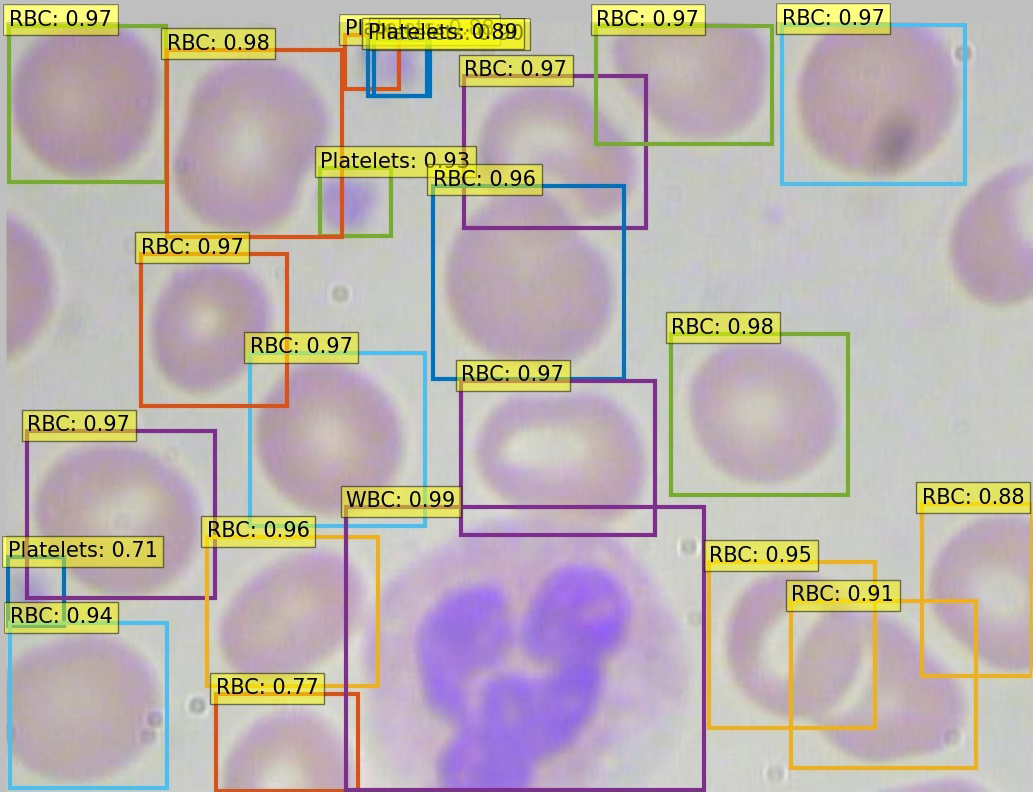